# Name : Snehith Oddula 

# Task 2

import the necessary packages

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [187]:
df=pd.read_csv(r'C:\Users\admin\Downloads\iris.csv')

In [188]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.drop('Id',axis=1,inplace=True)
#dropping the Id column

In [21]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [24]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
corr=df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


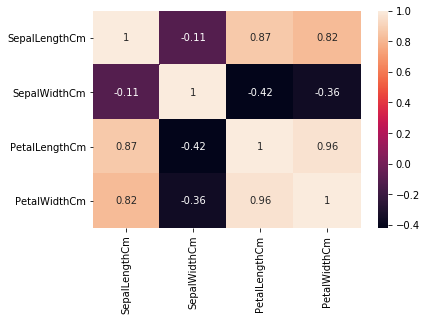

In [30]:
sns.heatmap(corr,annot=True)

#### there is a high correlation between petal length and petal width

# EDA

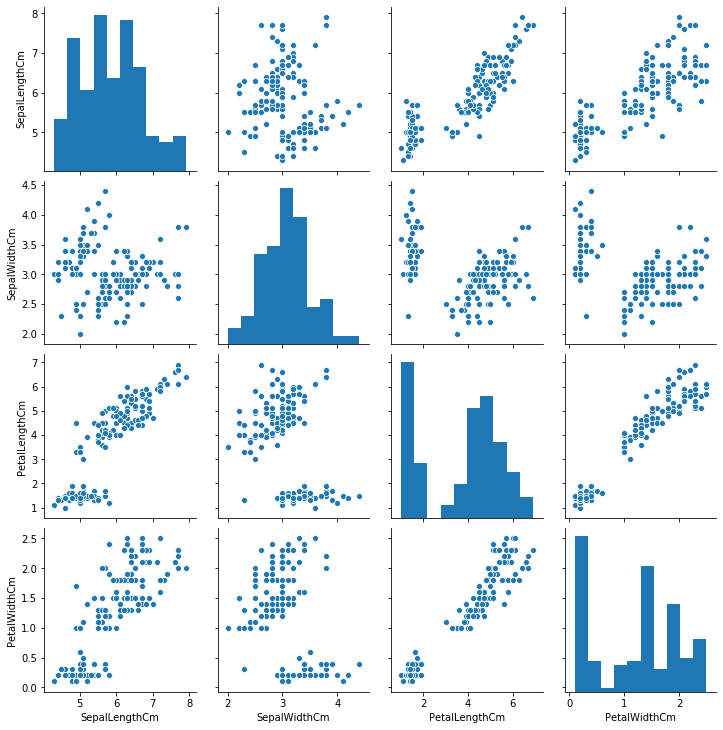

In [31]:
sns.pairplot(df)

let's check if there are any null values in the data


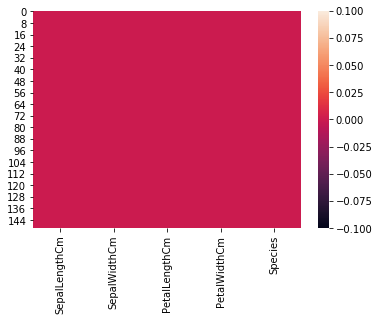

In [32]:
sns.heatmap(df.isnull())

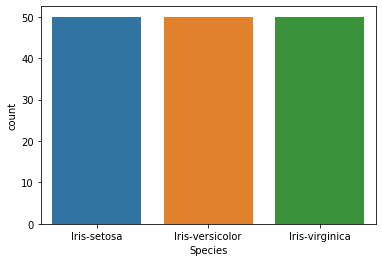

In [34]:
sns.countplot(x='Species',data=df)


we can say this is a balanced dataset

there were no null values in the above data

In [33]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## preparing the data

In [35]:
x=df.drop('Species',axis=1)
y=df['Species']

In [40]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test =train_test_split(x,y,random_state=10,test_size=0.2)

In [47]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
58,6.6,2.9,4.6,1.3
97,6.2,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
114,5.8,2.8,5.1,2.4
146,6.3,2.5,5.0,1.9


In [48]:
y_train.head()

58     Iris-versicolor
97     Iris-versicolor
129     Iris-virginica
114     Iris-virginica
146     Iris-virginica
Name: Species, dtype: object

# Training the data with decison tree algorithm

In [70]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [59]:
dtree=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=5,min_samples_split=25)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Text representation of decision tree

In [71]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_0 <= 5.30
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_0 >  5.30
|   |   |   |--- class: Iris-versicolor
|   |--- feature_2 >  4.75
|   |   |--- feature_2 <= 5.15
|   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  5.15
|   |   |   |--- class: Iris-virginica



# visualization of decision tree

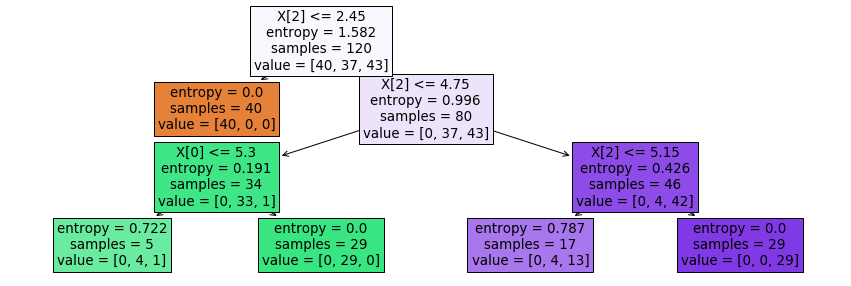

In [72]:
plt.figure(figsize=(15,5))
tree.plot_tree(dtree,filled=True)
plt.show()

In [73]:
predtree = dtree.predict(x_test)
print(classification_report(y_test,predtree),'\n')


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.93        30
   weighted avg       0.95      0.93      0.93        30
 



In [104]:
predtree

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica'],
      dtype=object)

In [74]:
print(confusion_matrix(y_test,predtree),'\n')


[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]] 



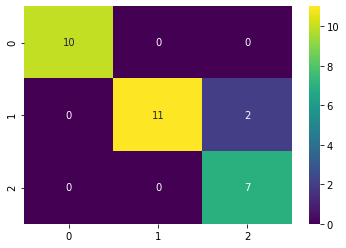

In [75]:
sns.heatmap(confusion_matrix(y_test,predtree),annot=True,cmap='viridis')

In [76]:
print("Accuracy:",metrics.accuracy_score(y_test,predtree),'\n')


Accuracy: 0.9333333333333333 



In [77]:
print ("cv:",cross_val_score(dtree,x,y,cv=5,scoring = 'accuracy').mean())

cv: 0.9400000000000001


# classification with support vector machine

In [226]:
from sklearn.datasets import load_iris

In [227]:
iris=load_iris()

In [228]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [229]:
df=pd.DataFrame(iris.data,columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])

In [230]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [231]:
df['target']=iris.target

In [232]:
df['target names']=iris.target_names[df['target']]

In [233]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [234]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

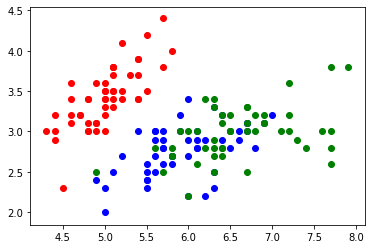

In [235]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],c='r')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],c='b')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],c='g')

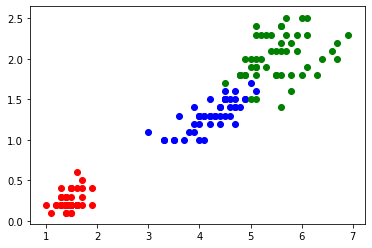

In [236]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],c='r')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],c='b')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],c='g')

In [237]:
from sklearn.model_selection import train_test_split
x=df.drop(['target','target names'],axis=1)
y=df[['target']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=10)


In [238]:
import sklearn.svm as gm
model=gm.SVC(kernel='poly')
model.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [239]:
pre=model.predict(x_test)

In [241]:
model.score(x_test,y_test)

1.0

In [247]:
f=confusion_matrix(y_test,pre)


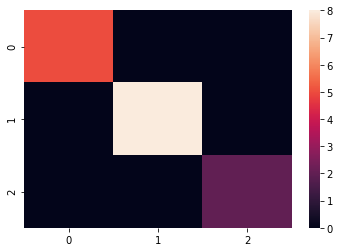

In [248]:
sns.heatmap(f)